In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vol_target import VolTarget, vol_of_vol
import pandas_datareader.data as reader

In [3]:
%matplotlib inline
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [6]:
us = reader.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', '1926-07-01', '2021-07-31')[0][['Mkt-RF']] / 100
mom = pd.read_csv('data_from_kenneth/25_Portfolios_ME_Prior_12_2_Daily.CSV', header = [0], index_col = 0, parse_dates=True) / 100

rf = reader.DataReader('F-F_Research_Data_Factors_daily', 'famafrench','1926-07-01','2021-07-31')[0][['RF']] / 100

rf = rf.loc[mom.index]
us = us.loc[mom.index]

In [7]:
big_mama = mom[['BIG HiPRIOR']]
big_mama = big_mama['BIG HiPRIOR'] - rf['RF']
big_mama = pd.DataFrame(big_mama, columns = ['BIG HiPRIOR'])
big_mama.index.name = 'Date'

<AxesSubplot:xlabel='Date'>

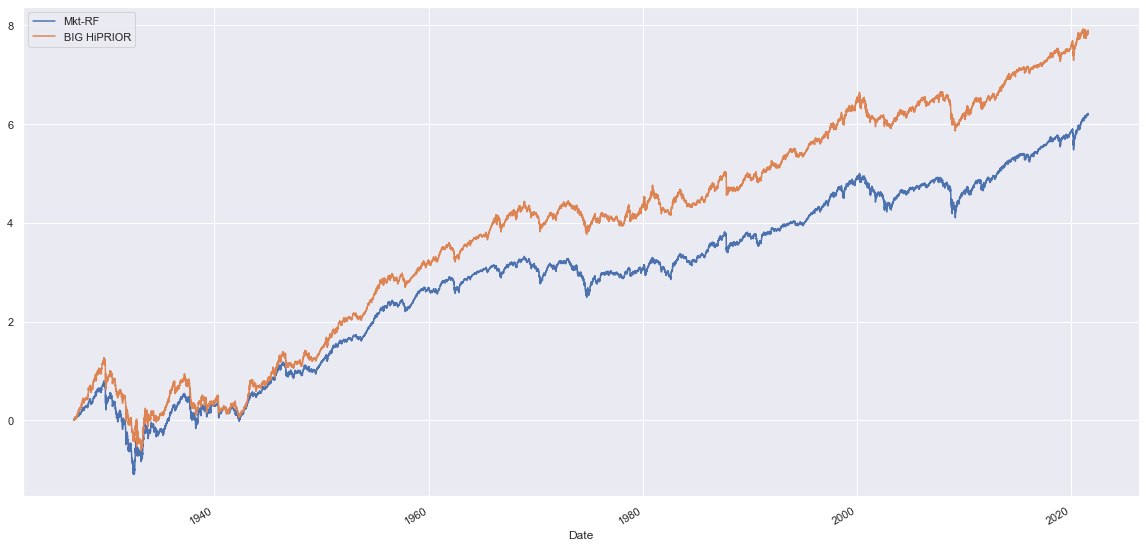

In [8]:
np.log(1+pd.merge(us,big_mama, on = 'Date', how = 'inner')).cumsum().plot()

In [9]:
print("big momentum 4th moment",np.float(big_mama.kurtosis()))
print("mkt-rf 4th moment",np.float(us.kurtosis()))

big momentum 4th moment 29.119786211003486
mkt-rf 4th moment 16.94166984069947


In [10]:
print("big momentum 1% tail drawdown",np.float(big_mama.quantile(q=0.01)))
print("mkt-rf 1% tail drawdown",np.float(us.quantile(q=0.01)))

print("big momentum 5% tail drawdown",np.float(big_mama.quantile(q=0.05)))
print("mkt-rf 5% tail drawdown",np.float(us.quantile(q=0.05)))

big momentum 1% tail drawdown -0.036406100000000004
mkt-rf 1% tail drawdown -0.0308
big momentum 5% tail drawdown -0.019009999999999996
mkt-rf 5% tail drawdown -0.0158


<AxesSubplot:xlabel='Date'>

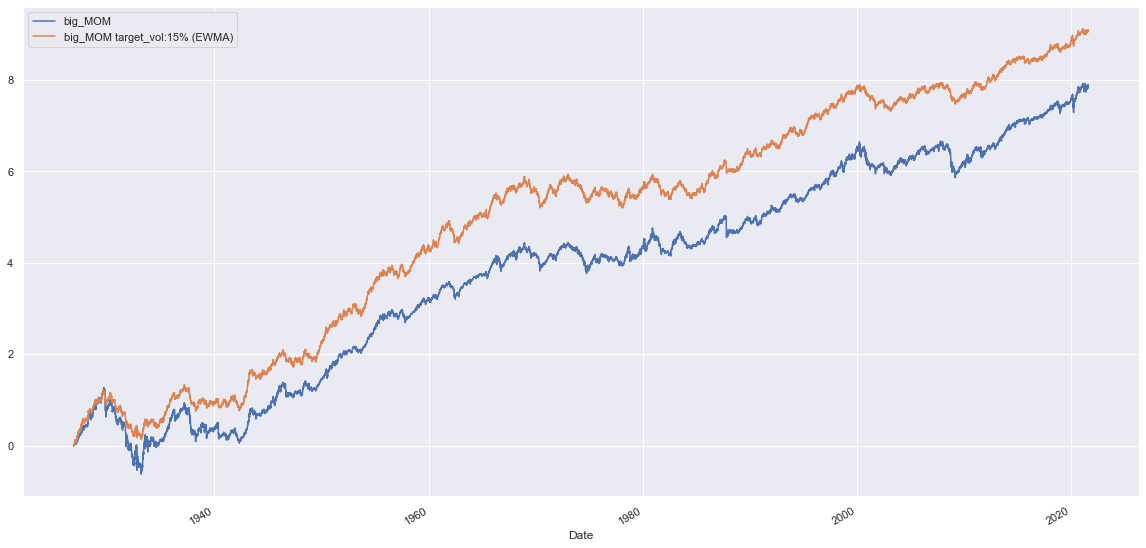

In [11]:
mom_15 = VolTarget(leverage_upper = 2, leverage_lower = 0.5, univariate_series = big_mama, target_vol = 0.15, lagging_days = 2)

mom_15_ewma = mom_15.vol_target_ewma_maker()

mom_vs_ewma = pd.merge(big_mama.iloc[3:], mom_15_ewma, on = 'Date', how = 'inner')
mom_vs_ewma.columns = ['big_MOM','big_MOM target_vol:15% (EWMA)']
np.log(1+mom_vs_ewma).cumsum().plot()

In [12]:
print(mom_vs_ewma.kurtosis())

big_MOM                          29.116535
big_MOM target_vol:15% (EWMA)     6.257480
dtype: float64


In [13]:
print("big momentum 15% target_vol 1% tail drawdown",np.float(mom_15_ewma.quantile(q=0.01)))
print("big momentum 1% tail drawdown",np.float(big_mama.iloc[3:].quantile(q=0.01)))

print("big momentum 15% target_vol 5% tail drawdown",np.float(mom_15_ewma.quantile(q=0.05)))
print("big momentum 5% tail drawdown",np.float(big_mama.iloc[3:].quantile(q=0.05)))

big momentum 15% target_vol 1% tail drawdown -0.029356080988645485
big momentum 1% tail drawdown -0.036406400000000005
big momentum 15% target_vol 5% tail drawdown -0.016968252054990987
big momentum 5% tail drawdown -0.019009999999999996
